In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 


{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [2]:
# 1. CARGA DEL DATASET

covertype = fetch_ucirepo(id=31)  # Dataset: Forest CoverType
df = covertype.data.original

In [14]:
print("\n ESTRUCTURA DEL DATASET")

print(f"• Nombre: {covertype.metadata['name']}")
print(f"• Área: {covertype.metadata['area']}")
print(f"• Características: {covertype.metadata['num_features']}")
print(f"• Instancias: {covertype.metadata['num_instances']:,}")

# Accede de forma segura a la variable objetivo
target = covertype.metadata.get('target', 'Cover_Type')
print(f"• Variable objetivo: {target}")

# Clasificación de variables
continuous_vars = ['Elevation', 'Aspect', 'Slope', 
                   'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 
                   'Horizontal_Distance_To_Roadways',
                   'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                   'Horizontal_Distance_To_Fire_Points']

wilderness_vars = [f'Wilderness_Area{i}' for i in range(1, 5)]
soil_vars = [f'Soil_Type{i}' for i in range(1, 41)]

print(f"\n CLASIFICACIÓN DE VARIABLES:")
print(f"• Variables continuas: {len(continuous_vars)}")
print(f"• Variables de área silvestre: {len(wilderness_vars)}")
print(f"• Variables de tipo de suelo: {len(soil_vars)}")
print(f"• Variable objetivo: {target}")



 ESTRUCTURA DEL DATASET
• Nombre: Covertype
• Área: Biology
• Características: 54
• Instancias: 581,012
• Variable objetivo: Cover_Type

 CLASIFICACIÓN DE VARIABLES:
• Variables continuas: 10
• Variables de área silvestre: 4
• Variables de tipo de suelo: 40
• Variable objetivo: Cover_Type


In [15]:
print("\n ANÁLISIS DE CALIDAD DE DATOS")
import pandas as pd
import numpy as np
# Información básica
print("\n TIPOS DE DATOS Y MEMORIA:")
print(df.info())

# Verificación de valores nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores_Faltantes': missing_data,
    'Porcentaje': missing_percent
}).sort_values('Valores_Faltantes', ascending=False)

missing_info = missing_info[missing_info['Valores_Faltantes'] > 0]
if len(missing_info) > 0:
    print("\n  VALORES FALTANTES DETECTADOS:")
    print(missing_info)
else:
    print(" No hay valores faltantes en el dataset")

# Verificación de duplicados
duplicates = df.duplicated().sum()
print(f"\n REGISTROS DUPLICADOS: {duplicates}")


 ANÁLISIS DE CALIDAD DE DATOS

 TIPOS DE DATOS Y MEMORIA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int6


 ANÁLISIS DE LA VARIABLE OBJETIVO: Cover_Type


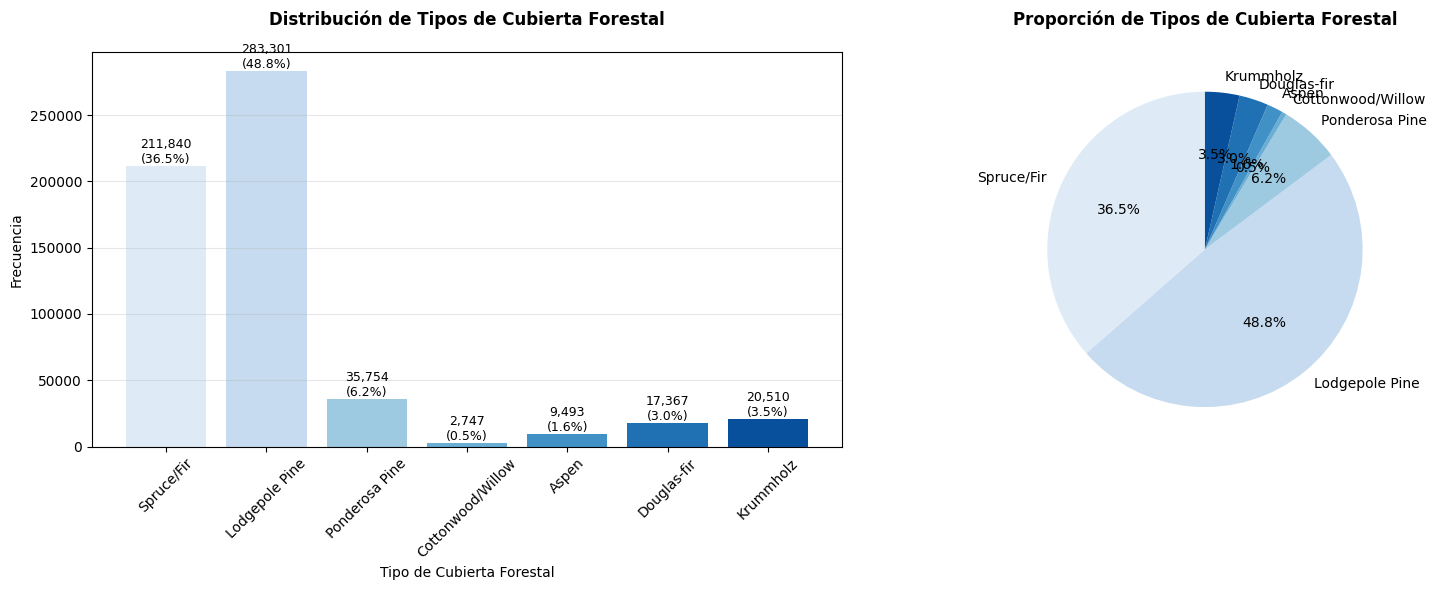


 ESTADÍSTICAS DE LA VARIABLE OBJETIVO:
 Código     Tipo_Cubierta  Frecuencia  Porcentaje
      1        Spruce/Fir      211840   36.460521
      2    Lodgepole Pine      283301   48.759922
      3    Ponderosa Pine       35754    6.153746
      4 Cottonwood/Willow        2747    0.472796
      5             Aspen        9493    1.633873
      6       Douglas-fir       17367    2.989095
      7         Krummholz       20510    3.530048

  ANÁLISIS DE BALANCE:
• Ratio de desbalance: 103.13:1
• Clase mayoritaria: Lodgepole Pine (283,301)
• Clase minoritaria: Cottonwood/Willow (2,747)


In [16]:
# 4. ANÁLISIS DE LA VARIABLE OBJETIVO
import matplotlib.pyplot as plt
import seaborn as sns

print("\n ANÁLISIS DE LA VARIABLE OBJETIVO: Cover_Type")

# Paleta de colores azul
PALETTE = sns.color_palette("Blues", n_colors=7)

# Distribución de clases
class_distribution = df['Cover_Type'].value_counts().sort_index()
class_percentages = (class_distribution / len(df)) * 100

# Descripción de las clases
class_descriptions = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine', 
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir', 
    7: 'Krummholz'
}

# Crear figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#  Gráfico de barras
bars = ax1.bar(
    [class_descriptions[i] for i in class_distribution.index], 
    class_distribution.values, 
    color=PALETTE
)
ax1.set_title('Distribución de Tipos de Cubierta Forestal', fontweight='bold', pad=20)
ax1.set_xlabel('Tipo de Cubierta Forestal')
ax1.set_ylabel('Frecuencia')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Etiquetas sobre barras
for bar, count, percentage in zip(bars, class_distribution.values, class_percentages):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2., height + 100,
             f'{count:,}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=9)

#  Gráfico de pie
wedges, texts, autotexts = ax2.pie(
    class_distribution.values,
    labels=[class_descriptions[i] for i in class_distribution.index],
    autopct='%1.1f%%',
    colors=PALETTE,
    startangle=90
)
ax2.set_title('Proporción de Tipos de Cubierta Forestal', fontweight='bold', pad=20)

# Mostrar
plt.tight_layout()
plt.show()

#  Estadísticas detalladas
print("\n ESTADÍSTICAS DE LA VARIABLE OBJETIVO:")
target_stats = pd.DataFrame({
    'Código': class_distribution.index,
    'Tipo_Cubierta': [class_descriptions[i] for i in class_distribution.index],
    'Frecuencia': class_distribution.values,
    'Porcentaje': class_percentages.values
})
print(target_stats.to_string(index=False))

#  Análisis de balance
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"\n  ANÁLISIS DE BALANCE:")
print(f"• Ratio de desbalance: {imbalance_ratio:.2f}:1")
print(f"• Clase mayoritaria: {class_descriptions[class_distribution.idxmax()]} ({class_distribution.max():,})")
print(f"• Clase minoritaria: {class_descriptions[class_distribution.idxmin()]} ({class_distribution.min():,})")



 ANÁLISIS UNIVARIANTE - VARIABLES CONTINUAS

 ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:
                                       count      mean       std     min  \
Elevation                           581012.0  2959.365   279.985  1859.0   
Aspect                              581012.0   155.657   111.914     0.0   
Slope                               581012.0    14.104     7.488     0.0   
Horizontal_Distance_To_Hydrology    581012.0   269.428   212.549     0.0   
Vertical_Distance_To_Hydrology      581012.0    46.419    58.295  -173.0   
Horizontal_Distance_To_Roadways     581012.0  2350.147  1559.255     0.0   
Hillshade_9am                       581012.0   212.146    26.770     0.0   
Hillshade_Noon                      581012.0   223.319    19.769     0.0   
Hillshade_3pm                       581012.0   142.528    38.275     0.0   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291  1324.195     0.0   

                                       25%     50%     75%     max     IQR  \


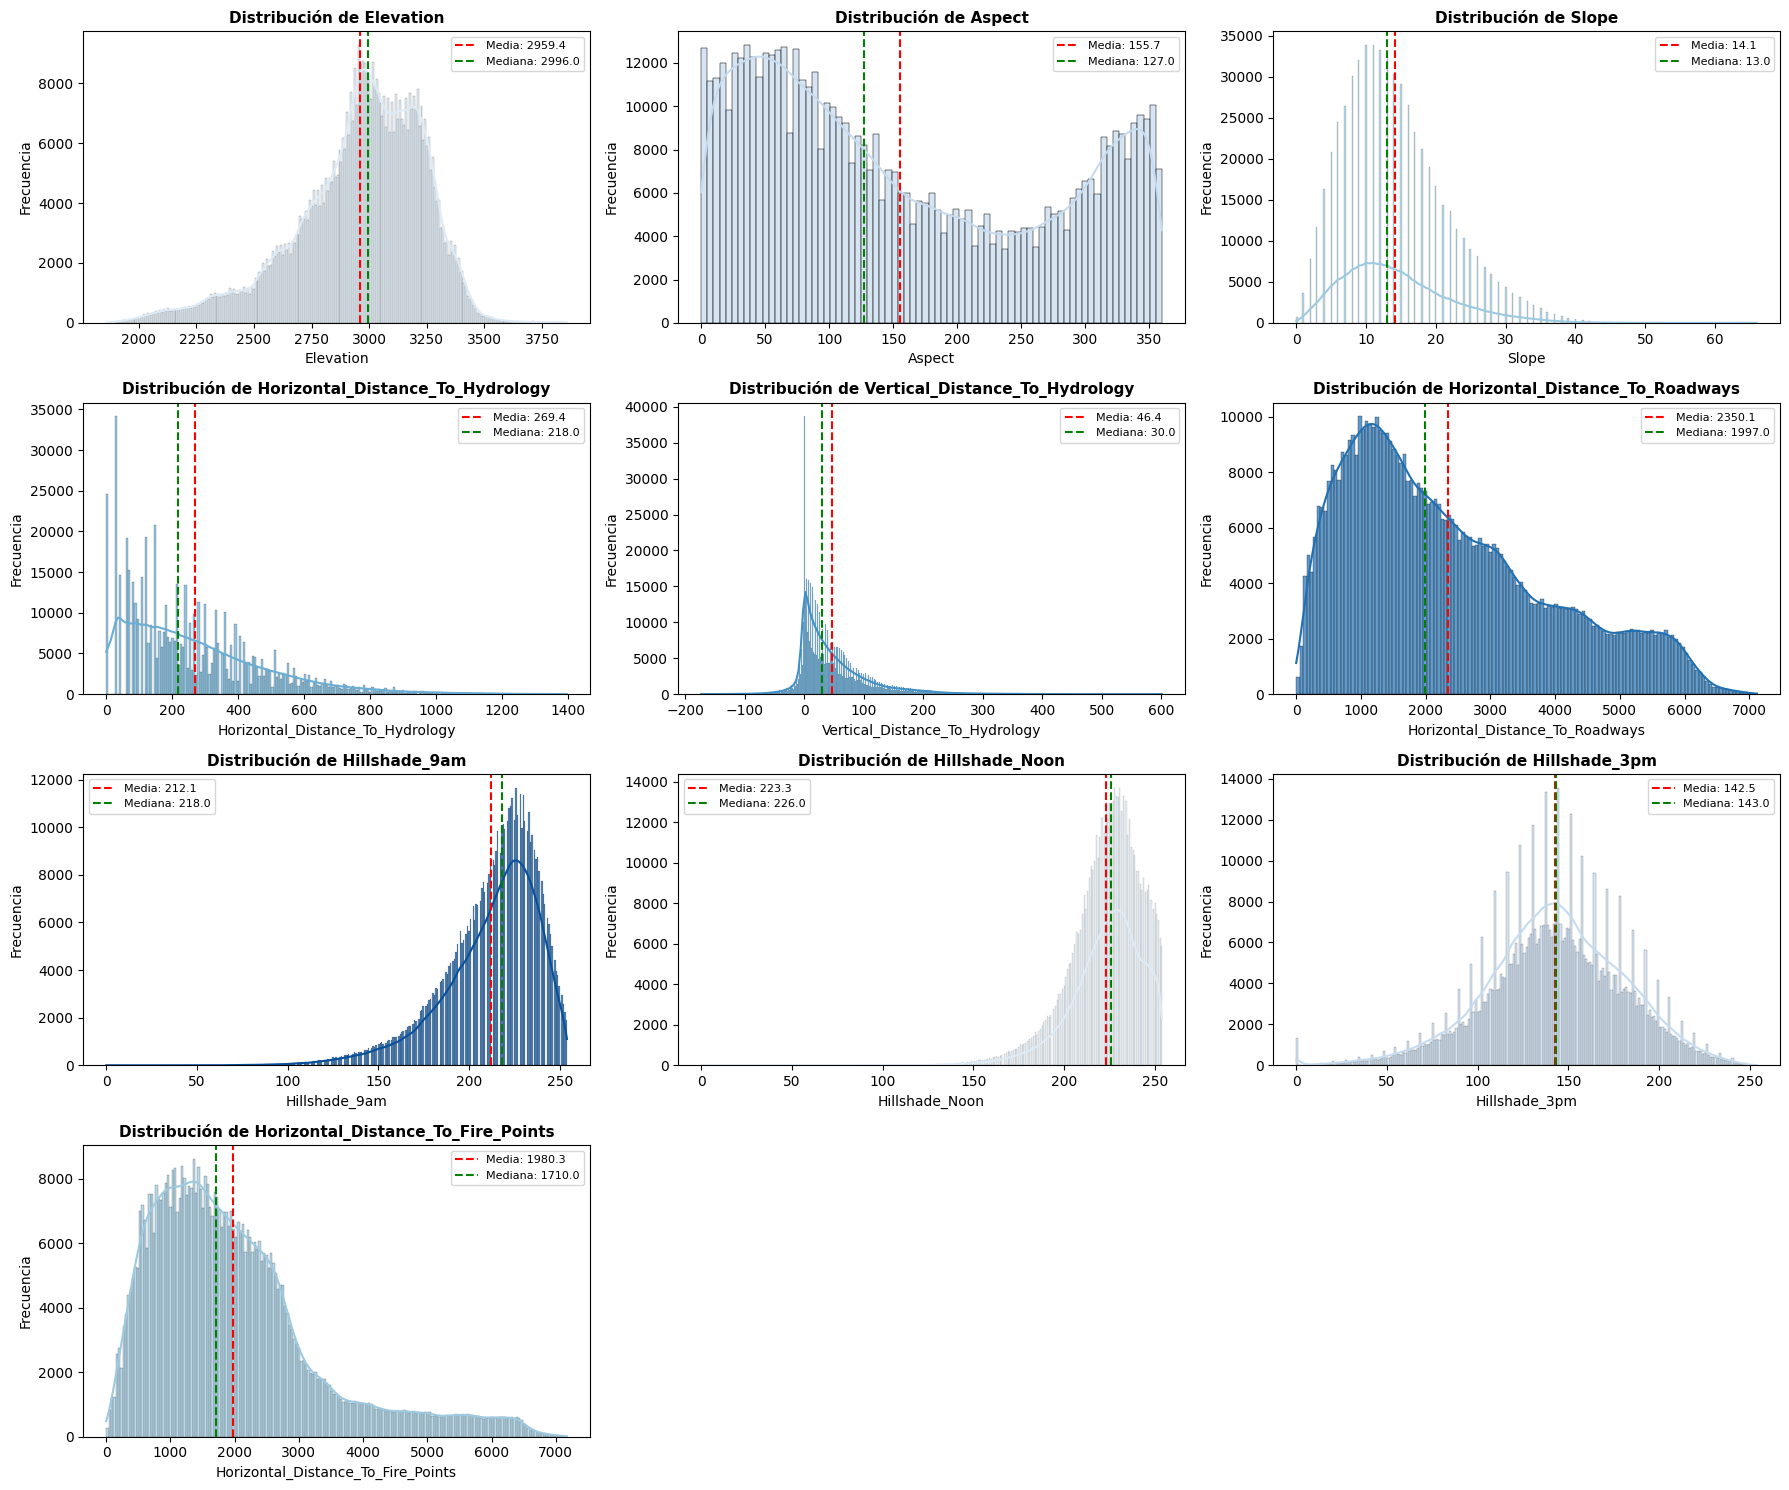

In [17]:
# 5. ANÁLISIS UNIVARIANTE - VARIABLES CONTINUAS
import matplotlib.pyplot as plt
print("\n ANÁLISIS UNIVARIANTE - VARIABLES CONTINUAS")

# Estadísticas descriptivas
print("\n ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:")
numeric_stats = df[continuous_vars].describe().T
numeric_stats['IQR'] = numeric_stats['75%'] - numeric_stats['25%']
numeric_stats['Coef_Variacion'] = (numeric_stats['std'] / numeric_stats['mean']) * 100
numeric_stats['Skewness'] = df[continuous_vars].skew()
numeric_stats['Kurtosis'] = df[continuous_vars].kurtosis()
numeric_stats['CV_Categoria'] = np.where(numeric_stats['Coef_Variacion'] > 50, 'Alta', 
                                       np.where(numeric_stats['Coef_Variacion'] > 20, 'Media', 'Baja'))

print(numeric_stats.round(3))

# Visualización de distribuciones
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    if i < len(axes):
        # Histograma con curva de densidad
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color=PALETTE[i % len(PALETTE)], alpha=0.7)
        axes[i].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        
        # Líneas de media y mediana
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, 
                       label=f'Media: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=1.5, 
                       label=f'Mediana: {median_val:.1f}')
        axes[i].legend(fontsize=8)

# Ocultar ejes no utilizados
for i in range(len(continuous_vars), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


 ANÁLISIS DE VARIABLES BINARIAS

 DISTRIBUCIÓN DE ÁREAS SILVESTRES:
 Wilderness_Area  Frecuencia  Porcentaje
Wilderness_Area1      260796       44.89
Wilderness_Area3      253364       43.61
Wilderness_Area4       36968        6.36
Wilderness_Area2       29884        5.14

  ANÁLISIS DE TIPOS DE SUELO (40 variables):
• Tipos de suelo presentes: 40
• Tipos de suelo ausentes: 0

 TOP 10 TIPOS DE SUELO MÁS COMUNES:
  Soil_Type  Frecuencia  Porcentaje
Soil_Type29      115247       19.84
Soil_Type23       57752        9.94
Soil_Type32       52519        9.04
Soil_Type33       45154        7.77
Soil_Type22       33373        5.74
Soil_Type10       32634        5.62
Soil_Type30       30170        5.19
Soil_Type12       29971        5.16
Soil_Type31       25666        4.42
Soil_Type24       21278        3.66


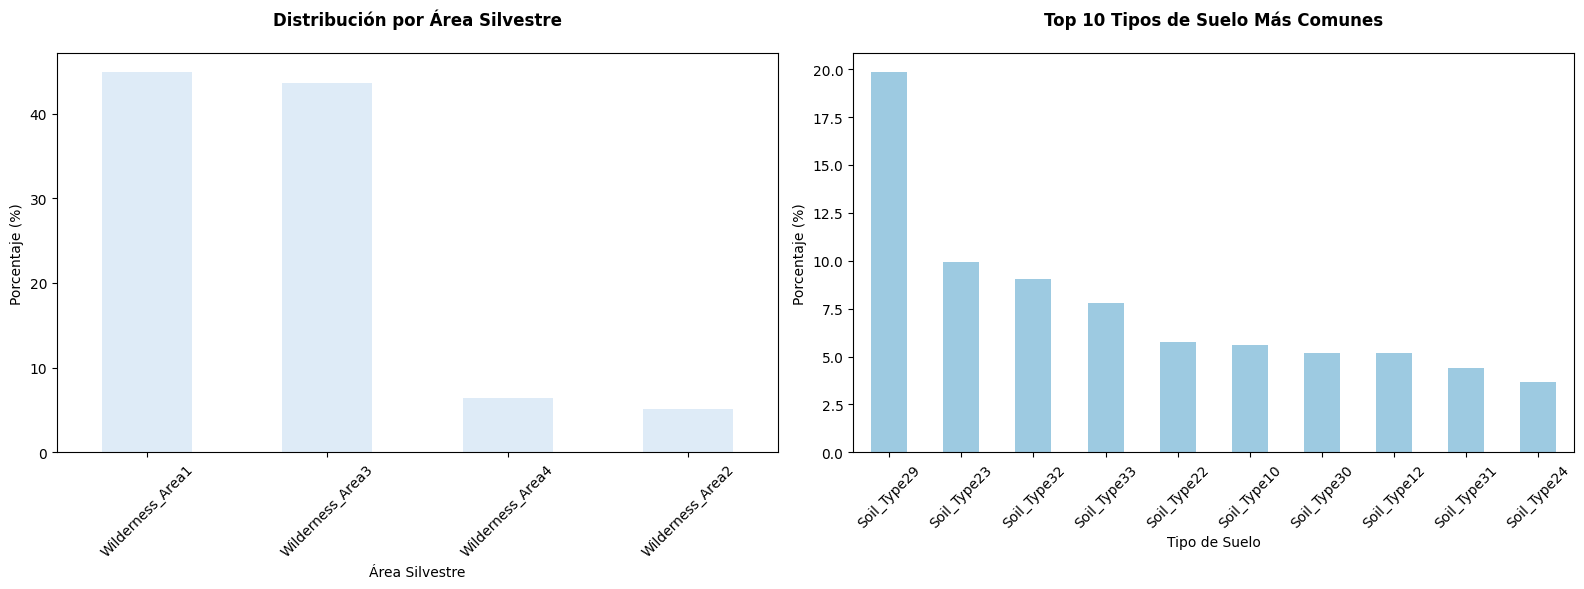

In [18]:
# 6. ANÁLISIS DE VARIABLES BINARIAS


print("\n ANÁLISIS DE VARIABLES BINARIAS")


# Análisis de áreas silvestres
print("\n DISTRIBUCIÓN DE ÁREAS SILVESTRES:")
wilderness_frequencies = {}
for col in wilderness_vars:
    if col in df.columns:
        wilderness_frequencies[col] = df[col].sum()

wilderness_freq_df = pd.DataFrame({
    'Wilderness_Area': wilderness_frequencies.keys(),
    'Frecuencia': wilderness_frequencies.values(),
    'Porcentaje': (np.array(list(wilderness_frequencies.values())) / len(df)) * 100
}).sort_values('Frecuencia', ascending=False)

print(wilderness_freq_df.round(2).to_string(index=False))

# Análisis de tipos de suelo
print(f"\n  ANÁLISIS DE TIPOS DE SUELO ({len(soil_vars)} variables):")
soil_frequencies = {}
for col in soil_vars:
    if col in df.columns and df[col].sum() > 0:
        soil_frequencies[col] = df[col].sum()

soil_freq_df = pd.DataFrame({
    'Soil_Type': soil_frequencies.keys(),
    'Frecuencia': soil_frequencies.values(),
    'Porcentaje': (np.array(list(soil_frequencies.values())) / len(df)) * 100
}).sort_values('Frecuencia', ascending=False)

print(f"• Tipos de suelo presentes: {len(soil_frequencies)}")
print(f"• Tipos de suelo ausentes: {len(soil_vars) - len(soil_frequencies)}")

print("\n TOP 10 TIPOS DE SUELO MÁS COMUNES:")
print(soil_freq_df.head(10).round(2).to_string(index=False))

# Visualización de distribuciones binarias
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Áreas silvestres
wilderness_freq_df.plot(kind='bar', x='Wilderness_Area', y='Porcentaje', 
                       ax=ax1, legend=False, color=PALETTE[0])
ax1.set_title('Distribución por Área Silvestre', fontweight='bold', pad=20)
ax1.set_ylabel('Porcentaje (%)')
ax1.set_xlabel('Área Silvestre')
ax1.tick_params(axis='x', rotation=45)

# Tipos de suelo (top 10)
soil_freq_df.head(10).plot(kind='bar', x='Soil_Type', y='Porcentaje', 
                          ax=ax2, legend=False, color=PALETTE[2])
ax2.set_title('Top 10 Tipos de Suelo Más Comunes', fontweight='bold', pad=20)
ax2.set_ylabel('Porcentaje (%)')
ax2.set_xlabel('Tipo de Suelo')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 7. ANÁLISIS BIVARIANTE - RELACIÓN CON TARGET

print("\n ANÁLISIS BIVARIANTE - VARIABLES vs TARGET")


# Variables clave para análisis bivariante
key_continuous_vars = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Horizontal_Distance_To_Roadways', 'Hillshade_9am']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(key_continuous_vars):
    # Boxplot por clase
    boxplot = sns.boxplot(data=df, x='Cover_Type', y=var, ax=axes[i], palette=PALETTE)
    axes[i].set_title(f'{var} por Tipo de Cubierta', fontweight='bold')
    axes[i].set_xlabel('Tipo de Cubierta')
    axes[i].set_ylabel(var)
    axes[i].set_xticklabels([class_descriptions[i] for i in range(1, 8)], rotation=45)

# Análisis de wilderness areas por clase
wilderness_by_class = pd.DataFrame()
for wilderness in wilderness_vars:
    if wilderness in df.columns:
        temp = df.groupby('Cover_Type')[wilderness].mean().reset_index()
        temp['Wilderness_Area'] = wilderness
        wilderness_by_class = pd.concat([wilderness_by_class, temp])

wilderness_pivot = wilderness_by_class.pivot(index='Cover_Type', columns='Wilderness_Area', values=wilderness)
wilderness_pivot.plot(kind='bar', ax=axes[5], color=PALETTE[:4])
axes[5].set_title('Presencia de Áreas Silvestres por Clase', fontweight='bold')
axes[5].set_xlabel('Tipo de Cubierta')
axes[5].set_ylabel('Proporción Media')
axes[5].set_xticklabels([class_descriptions[i] for i in range(1, 8)], rotation=45)
axes[5].legend(title='Área Silvestre')

plt.tight_layout()
plt.show()